In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np

np.random.seed(0)

import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt

# To set the color used to display monochrome images.
plt.rcParams['image.cmap'] = 'Blues'

In [10]:
data_gen = ImageDataGenerator(rescale=1.0/255)

In [11]:
imgdir = 'a5_images' # or wherever you put them...
img_size = 128
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

val_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [31]:
Xbatch, Ybatch = train_generator.next()
X_val, Y_val = val_generator.next()

In [33]:
#create model
def make_convnet(img_size, channel):
    #create model
    model = Sequential()

    #add model layers
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(img_size,img_size,channel))) # layer 1
    model.add(Conv2D(32, kernel_size=3, activation='relu')) # layer 2
    model.add(Flatten())
    model.add(Dense(2, activation='sigmoid'))
    model.add(Flatten())

    ## Binary crossentropy loss function and Adam optimizer 
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
    return model

def train_model(model, epo):
    model.fit(Xbatch, Ybatch, validation_data=(X_val, Y_val), epochs=epo)
    return model

def model_info(model):
    return model.summary()

In [34]:
mm = make_convnet(img_size, 3)
trained_model = train_model(mm, 10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.7045 - accuracy: 0.3750 - val_loss: 6.2664 - val_accuracy: 0.5938
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 5.4817 - accuracy: 0.6250 - val_loss: 6.2664 - val_accuracy: 0.5938
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 4.2982 - accuracy: 0.6250 - val_loss: 9.0542 - val_accuracy: 0.5938
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 1.3232 - accuracy: 0.6250 - val_loss: 9.0542 - val_accuracy: 0.5938
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 1.2615 - accuracy: 0.6250 - val_loss: 9.0542 - val_accuracy: 0.5938
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.5397 - accuracy: 0.5625 - val_loss: 7.6603 - val_accuracy: 0.4062
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.2759 - accuracy: 0.3438 - val_loss: 6.2664 - val_accuracy: 0.5938
Epoch 8/10
1/1 [=========================

In [35]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range= 0.85,
        #zoom_range=[1,0.7],
        horizontal_flip=True,
        #height_shift_range=0.01
        )

test_datagen = ImageDataGenerator(rescale=1./255)


## Only do augmentation on the traing data...
train_generator = train_datagen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='binary' ,
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.


In [12]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

In [20]:
vggmodel = applications.VGG16(weights='imagenet', include_top=True)

In [23]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))

In [25]:
feature_extractor.summary()
# vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input) # behövs denna?

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

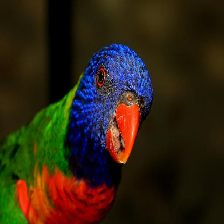

In [26]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path = 'bird.jpg'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

In [29]:
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

In [47]:
'''x = preprocess_input(X_val)
features = mm.predict(X_val)
pred = decode_predictions(features)'''

'x = preprocess_input(X_val)\nfeatures = mm.predict(X_val)\npred = decode_predictions(features)'

In [38]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

In [40]:
train_generator = train_datagen.flow_from_directory(imgdir + '/train',target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory(imgdir + '/validation',target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [41]:
def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(Dense(128, activation='relu', name='fc2'))
    model.add(Dense(1, activation='sigmoid', name='output'))
    return model

In [42]:
model=VGG16()

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [45]:
from keras.models import Model
Vgg16 = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

In [48]:
Vgg16.load_weights('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [49]:
for layer in Vgg16.layers:
    layer.trainable = False

In [50]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.Conv2D object at 0x0000023500185FF0> False
<keras.layers.convolutional.Conv2D object at 0x000002356E53AE30> False
<keras.layers.pooling.MaxPooling2D object at 0x00000235657FE8C0> False
<keras.layers.convolutional.Conv2D object at 0x0000023500024B50> False
<keras.layers.convolutional.Conv2D object at 0x0000023500024A30> False
<keras.layers.pooling.MaxPooling2D object at 0x000002356E53B4F0> False
<keras.layers.convolutional.Conv2D object at 0x000002356C91A920> False
<keras.layers.convolutional.Conv2D object at 0x000002356C919E70> False
<keras.layers.convolutional.Conv2D object at 0x000002356C949AE0> False
<keras.layers.pooling.MaxPooling2D object at 0x0000023500025180> False
<keras.layers.convolutional.Conv2D object at 0x000002356C9FFE80> False
<keras.layers.convolutional.Conv2D object at 0x000002356C92BE80> False
<keras.layers.convolutional.Conv2D object at 0x0000023500027640> False
<keras.layers.pooling.MaxPooling2D object at 0x000002356C93B250> False
<keras

In [68]:
#from keras.optimizers import SGD
import tensorflow as tf
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [69]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [70]:
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [73]:
H = model.fit(train_generator,validation_data=test_generator,epochs=1, steps_per_epoch=1,verbose=1,callbacks=[mc,es])

1/1 [==============================] - 161s 161s/step - loss: 0.6954 - accuracy: 0.5000 - val_loss: 0.6964 - val_accuracy: 0.5000


In [65]:
features = mm.predict(x)

In [75]:
fe = model.predict(test_generator)

In [76]:
fe

array([[0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],
       [0.5405372],


In [79]:
fe_train = model.predict(train_generator)

In [80]:
fe_train

array([[0.5405372],
       [0.5405372],
       [0.5405372],
       ...,
       [0.5405372],
       [0.5405372],
       [0.5405372]], dtype=float32)